# Avocado type [organic vs conventional] based on price, region, and sales data

### Import Libraries

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import svm
from time import gmtime, strftime
from pprint import pprint

### Load Data

In [3]:
# Load training data
data = pd.read_csv("inputs/avocado.csv")
data = data.sample(frac=1).reset_index(drop=True)

# Remove first column of indexes
data = data.copy().iloc[:,1:]
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-08-09,1.76,2882.04,1224.64,1107.40,0.00,550.00,550.00,0.00,0.00,organic,2015,GrandRapids
1,2016-02-07,1.60,31000.01,872.31,29897.70,0.00,230.00,230.00,0.00,0.00,organic,2016,Chicago
2,2016-02-28,1.64,11259.09,6.00,1286.52,0.00,9966.57,7968.65,1997.92,0.00,organic,2016,Boston
3,2017-12-10,2.05,13284.31,2436.56,6895.21,0.00,3952.54,3952.54,0.00,0.00,organic,2017,SanDiego
4,2015-01-04,1.01,1683795.30,1027842.30,466641.12,10476.89,178834.99,177360.20,440.57,1034.22,conventional,2015,Plains
5,2015-04-19,1.82,2076.77,1375.82,35.37,13.42,652.16,652.16,0.00,0.00,organic,2015,Jacksonville
6,2016-11-06,0.99,643630.66,389129.36,47289.95,17719.27,189492.08,106571.99,82920.09,0.00,conventional,2016,WestTexNewMexico
7,2016-10-02,1.40,214726.86,42262.02,106682.04,191.99,65590.81,64688.80,902.01,0.00,conventional,2016,HarrisburgScranton
8,2017-10-29,1.53,452358.05,109352.84,121941.84,14722.61,206340.76,169263.24,36815.75,261.77,conventional,2017,Seattle
9,2018-02-18,1.25,3135330.32,709218.57,1150144.86,24776.61,1251190.28,1015372.21,224403.31,11414.76,conventional,2018,Midsouth


### Filter  Data 

In [4]:
avoc_clean_data = data.drop(['Date','type','region','year'], axis = 1)
avoc_clean_data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.76,2882.04,1224.64,1107.40,0.00,550.00,550.00,0.00,0.00
1,1.60,31000.01,872.31,29897.70,0.00,230.00,230.00,0.00,0.00
2,1.64,11259.09,6.00,1286.52,0.00,9966.57,7968.65,1997.92,0.00
3,2.05,13284.31,2436.56,6895.21,0.00,3952.54,3952.54,0.00,0.00
4,1.01,1683795.30,1027842.30,466641.12,10476.89,178834.99,177360.20,440.57,1034.22
5,1.82,2076.77,1375.82,35.37,13.42,652.16,652.16,0.00,0.00
6,0.99,643630.66,389129.36,47289.95,17719.27,189492.08,106571.99,82920.09,0.00
7,1.40,214726.86,42262.02,106682.04,191.99,65590.81,64688.80,902.01,0.00
8,1.53,452358.05,109352.84,121941.84,14722.61,206340.76,169263.24,36815.75,261.77
9,1.25,3135330.32,709218.57,1150144.86,24776.61,1251190.28,1015372.21,224403.31,11414.76


In [5]:
# Remove first column of indexes
data = data.drop(['Date'], axis = 1)
print data.columns
data = pd.get_dummies(data,columns = ['year','region'])
data

Index([u'AveragePrice', u'Total Volume', u'4046', u'4225', u'4770',
       u'Total Bags', u'Small Bags', u'Large Bags', u'XLarge Bags', u'type',
       u'year', u'region'],
      dtype='object')


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.76,2882.04,1224.64,1107.40,0.00,550.00,550.00,0.00,0.00,organic,...,0,0,0,0,0,0,0,0,0,0
1,1.60,31000.01,872.31,29897.70,0.00,230.00,230.00,0.00,0.00,organic,...,0,0,0,0,0,0,0,0,0,0
2,1.64,11259.09,6.00,1286.52,0.00,9966.57,7968.65,1997.92,0.00,organic,...,0,0,0,0,0,0,0,0,0,0
3,2.05,13284.31,2436.56,6895.21,0.00,3952.54,3952.54,0.00,0.00,organic,...,0,0,0,0,0,0,0,0,0,0
4,1.01,1683795.30,1027842.30,466641.12,10476.89,178834.99,177360.20,440.57,1034.22,conventional,...,0,0,0,0,0,0,0,0,0,0
5,1.82,2076.77,1375.82,35.37,13.42,652.16,652.16,0.00,0.00,organic,...,0,0,0,0,0,0,0,0,0,0
6,0.99,643630.66,389129.36,47289.95,17719.27,189492.08,106571.99,82920.09,0.00,conventional,...,0,0,0,0,0,0,0,0,0,1
7,1.40,214726.86,42262.02,106682.04,191.99,65590.81,64688.80,902.01,0.00,conventional,...,0,0,0,0,0,0,0,0,0,0
8,1.53,452358.05,109352.84,121941.84,14722.61,206340.76,169263.24,36815.75,261.77,conventional,...,0,0,0,0,0,0,0,0,0,0
9,1.25,3135330.32,709218.57,1150144.86,24776.61,1251190.28,1015372.21,224403.31,11414.76,conventional,...,0,0,0,0,0,0,0,0,0,0


#### Initialize Data

In [6]:
#get the number of rows and columns
r, c = data.shape

#get the list of columns
cols = data.columns

# Save training data and test data
# Extract only the values
avocado = data.drop(['type'], axis = 1).values

# Extract Type of Avocado
avocado_labels = data['type'].values

In [7]:
avoc_clean = avoc_clean_data.values

#### Partition Data 

In [8]:
# Folds 
fold = 10

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0

#### Standardize Data

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

sc = StandardScaler()
avocado_enc = sc.fit_transform(avocado)

le = LabelEncoder()
avocado_labels_enc = le.fit_transform(avocado_labels)

In [10]:
avoc_clean = sc.fit_transform(avoc_clean)

In [11]:
print avoc_clean.shape

(18249, 9)


### Plotting Functions

In [12]:
def plotScatter(title, filename, xlabel, ylabel, x_data, y_data, labels, color):
    # Graph Results :
    # - X axis: number of observations in training set
    # - Y axis: success rate of trained model
    
    plt.style.use('seaborn-whitegrid')
    
    # Plot Results
    fig, ax = plt.subplots()

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.scatter(x_data, y_data, c=labels, alpha=0.5, cmap=color, s=10) #jet # plt.cm.Set3

    plt.show()

    fig.savefig('outputs/avocado/' + filename, bbox_inches='tight', facecolor=fig.get_facecolor())

In [13]:
def plotLinePlot(title, filename, xlabel, ylabel, x_data, y_data):
    # Graph Results :
    # - X axis: number of observations in training set
    # - Y axis: success rate of trained model
    plt.style.use('seaborn-whitegrid')

    # Plot Results
    fig, ax = plt.subplots()
    
    ax.xaxis.set_major_locator(plt.MaxNLocator(len(x_data)))
    ax.yaxis.set_major_locator(plt.MaxNLocator(len(y_data)))
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.plot(x_data, y_data, alpha=1.0) #jet

    plt.show()

    fig.savefig('outputs/avocado/' + filename, bbox_inches='tight', facecolor=fig.get_facecolor())

In [14]:
def make_ellipses(gmm, ax, colors, c1_idx, c2_idx):
    ell_markers = []
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][c1_idx:c2_idx+1, c1_idx:c2_idx+1]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[c1_idx:c2_idx+1, c1_idx:c2_idx+1]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][c1_idx:c2_idx+1])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, c1_idx:c2_idx+1], v[0], v[1],
                                  180 + angle, color=color)#, label='Ellipse{}'.format(n+1))
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(gmm.weights_[n])
        
        # create legend marker
        marker, = plt.plot([],[], marker="o", markersize=10, color=color, 
                          label="Ellipse Weight: {}".format(gmm.weights_[n]))
        ell_markers.append(ell)
        
        # plot ellipse and center
        ax.add_artist(ell)        
        ax.scatter(gmm.means_[n,0], gmm.means_[n,1], marker='x', color=color)
    # Add legend
    legend = ax.legend(loc='upper left', fontsize='x-large')
    ax.add_artist(legend)

In [15]:
def make_bar_plot(learner, ax, colors, num_clusters):
    ax.bar(range(1, num_clusters+1), learner.weights_, color=colors)
    ax.set_title('Weight Distribution for Components', fontsize=20)
    ax.set_xlabel('Components', fontsize='xx-large')
    ax.set_ylabel('Weight of Each Component', fontsize='xx-large')
    ax.xaxis.set_ticks(np.arange(1, num_clusters+1, 1))

In [16]:
def plot_em_covariances(title, filename, xlabel, ylabel, num_clusters, X, learner,
                        xlim, ylim, c1_idx, c2_idx):
    
    fig = plt.figure(figsize=(20,10))
    h = fig.add_subplot(121) #211
    
    plt.style.use('seaborn-whitegrid')
    
    # Choose colors
    idx = np.random.choice(12, num_clusters, replace=False)
    colors = [ plt.cm.Set3.colors[i] for i in idx ]
    
    print num_clusters
     
    learner = learner[num_clusters-1]
    predict = learner.fit_predict(X)
    
    # plot points
    for n, color in enumerate(colors):
        reduced_data = X[predict == n]
        print(reduced_data.shape)
        plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=1, color=color) # label=predict
    
    # plot covariances
    make_ellipses(learner, h, colors, c1_idx, c2_idx)
   
    h.set_title(title, fontsize=20)
    h.set_xlabel(xlabel, fontsize='xx-large')
    h.set_xlim(xlim[0],xlim[1])
    h.set_ylabel(ylabel, fontsize='xx-large')
    h.set_ylim(ylim[0],ylim[1]) # -1, 6
    
    # plot weight distribution
    i = fig.add_subplot(122) #212
    make_bar_plot(learner, i, colors, num_clusters)
    
    fig.savefig('outputs/avocado/em_cov_' + filename, bbox_inches='tight', facecolor=fig.get_facecolor())

In [267]:
def bar_plot_exp_var(title, filename, xlabel, ylabel, exp_var_ratios, num_clusters):
    fig = plt.figure()#figsize=(15,15))
    ax = fig.add_subplot(121)
    print num_clusters
    
    plt.style.use('seaborn-whitegrid')
    
    # Choose colors
    idx = np.random.choice(12, num_clusters, replace=False)
    colors = [ plt.cm.Set3.colors[i] for i in idx ]
    
    # set figure titles
    ax.set_title(title, fontsize='x-large')
    ax.set_xlabel(xlabel, fontsize='large')
    ax.set_ylabel(ylabel, fontsize='large')
    
    # plot bar plot
    ax.bar(range(1, num_clusters+1), exp_var_ratios, color=colors)
    ax.xaxis.set_ticks(np.arange(1, num_clusters+1, 1))
    plt.yticks(np.arange(min(exp_var_ratios), max(exp_var_ratios)+1))
    ax.set_yscale('log')
    
    fig.savefig('outputs/avocado/' + filename, bbox_inches='tight', facecolor=fig.get_facecolor())

In [195]:
def plot_nn(title, filename, xlabel, ylabel, nn_names, nn_results):
    fig = plt.figure(figsize=(30,5))
    ax = fig.add_subplot(121)
    
    plt.style.use('seaborn-whitegrid')
    
    # Choose colors
    idx = np.random.choice(12, len(nn_names), replace=False)
    colors = [ plt.cm.Set3.colors[i] for i in idx ]
    
    ax.bar(nn_names, nn_results, color=colors)
    ax.set_title(title, fontsize='xx-large')
    ax.set_ylabel('Success Rate', fontsize='x-large')
    ax.set_xlabel('Hidden Layer Size', fontsize='x-large')
    ax.set_ylim(0,1.0)
    ax.set_yticks(np.arange(0,1.0+.1,.1))
    
    plt.show()

    fig.savefig('outputs/avocado/' + filename, bbox_inches='tight', facecolor=fig.get_facecolor())

## Clustering
-  #### k-means clustering
    - Hard Clusters
-  #### Expectation Maximization
    - Soft Clusters

### __[K-Means Clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)__


In [84]:
from sklearn.cluster import KMeans

In [83]:
def run_kmeans(iter):
    km_learner = []
    # Run kmeans and record results
    for i in range(1,iter+1,1):
        print("clusters: "+str(i))

        # Run KNN with i neighbors
        kmeans = KMeans(n_clusters=i, random_state=0)
        
        km_learner.append(kmeans)
    return km_learner

In [934]:
%%time
# initialize prediction results
kmeans_score_success = []
kmeans_success = []
kmeans_cluster_means = []
kmeans_labels = []
kmeans_inertia = []
kmeans_learner = []

kmeans_learner = run_kmeans(10)

# run kmeans and record results
for i in range(0,len(kmeans_learner)):
    # fit the data
    print("clusters: " + str(i))
    kmeans_learner[i].fit(avoc_clean,None)
    kmeans_score_success.append(kmeans_learner[i].score(avoc_clean,None))
    
    # append means (n_components(i), n_features(dataset))
    kmeans_cluster_means.append(kmeans_learner[i].cluster_centers_)
    kmeans_labels.append(kmeans_learner[i].labels_)
    kmeans_inertia.append(kmeans_learner[i].inertia_)
    
    # fit data with Cross-Validation
    scores = cross_val_score(kmeans_learner[i], avoc_clean, None, cv=fold)
    kmeans_success.append(scores.mean())

clusters: 1
clusters: 2
clusters: 3
clusters: 4
clusters: 5
clusters: 6
clusters: 7
clusters: 8
clusters: 9
clusters: 10
clusters: 0
clusters: 1
clusters: 2
clusters: 3
clusters: 4
clusters: 5
clusters: 6
clusters: 7
clusters: 8
clusters: 9
CPU times: user 1min 45s, sys: 6.94 s, total: 1min 52s
Wall time: 36.6 s


In [935]:
# Check means to determine clusters to plot
for i in range(0,len(kmeans_cluster_means)):
    print "num clusters: " + str(i+1)
    for j in range(0,len(kmeans_cluster_means[i])):
        np_kmeans = np.array(kmeans_cluster_means[i][j])
        index_max = np.argmax(np_kmeans)
        print "max idx: " + str(index_max)
        pprint(kmeans_cluster_means[i][j])

num clusters: 1
max idx: 0
array([ 1.42067664e-16,  5.97545649e-17, -9.25033760e-18, -4.27018215e-17,
       -7.68609973e-16, -7.44772331e-17,  1.53310429e-17, -1.83785820e-16,
       -9.67392420e-16])
num clusters: 2
max idx: 1
array([-0.77972053,  9.52218448,  9.26355344,  9.40106691,  8.33663556,
        9.07596227,  9.1374467 ,  8.23518265,  6.99874809])
max idx: 0
array([ 0.00728832, -0.08900714, -0.08658963, -0.08787502, -0.07792541,
       -0.08483615, -0.08541087, -0.07697709, -0.06541971])
num clusters: 3
max idx: 1
array([-0.81186608,  1.04790117,  1.02444207,  0.99769644,  0.98519367,
        1.03001929,  1.04717052,  0.89487327,  0.91301809])
max idx: 0
array([ 0.06896605, -0.17460997, -0.17024409, -0.16961247, -0.15797232,
       -0.16877852, -0.1706879 , -0.15015198, -0.1390906 ])
max idx: 1
array([-0.77972053,  9.52218448,  9.26355344,  9.40106691,  8.33663556,
        9.07596227,  9.1374467 ,  8.23518265,  6.99874809])
num clusters: 4
max idx: 7
array([-0.66073593, -0.1

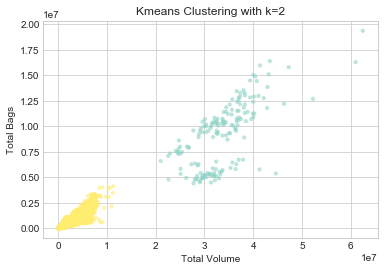

In [943]:
plotScatter('Kmeans Clustering with k=2', 'km_2_vb', 'Total Volume', 
            'Total Bags', data["Total Volume"],  data["Total Bags"],
            kmeans_labels[1], plt.cm.Set3)

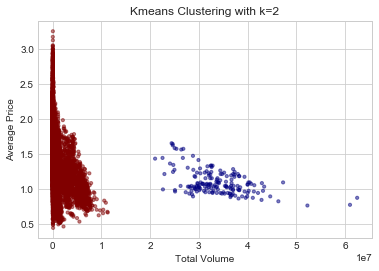

In [944]:
plotScatter('Kmeans Clustering with k=2', 'km_2_ta', 'Total Volume', 
            'Average Price', data["Total Volume"],  data["AveragePrice"],
            kmeans_labels[1], plt.cm.jet)

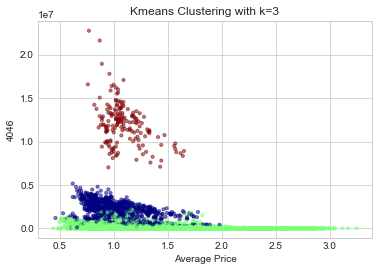

In [945]:
plotScatter('Kmeans Clustering with k=3', 'km_3_a4046', 'Average Price',
            '4046', data["AveragePrice"], data["4046"], 
            kmeans_labels[2], plt.cm.jet)

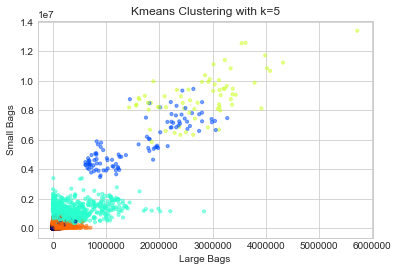

In [947]:
plotScatter('Kmeans Clustering with k=5', 'km_5_lbsb', 'Large Bags',
            'Small Bags', data["Large Bags"], data["Small Bags"], 
            kmeans_labels[5], plt.cm.jet)

- explanations of your methods: How did you choose k?
- a description of the kind of clusters that you got.
- analyses of your results. Why did you get the clusters you did? Do they make "sense"? If you used data that already had labels (for example data from a classification problem from assignment #1) did the clusters line up with the labels? Do they otherwise line up naturally? Why or why not? Compare and contrast the different algorithms. What sort of changes might you make to each of those algorithms to improve performance? How much performance was due to the problems you chose? Be creative and think of as many questions you can, and as many answers as you can. Take care to justify your analysis with data explictly.

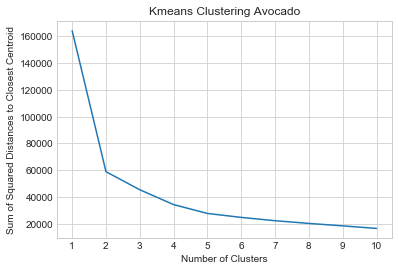

In [948]:
plotLinePlot('Kmeans Clustering Avocado', 'km_inertia', 
             'Number of Clusters', 'Sum of Squared Distances to Closest Centroid', 
             range(1,11,1), kmeans_inertia)

### __[Expectation Maximization](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)__
- soft clusters


In [85]:
from sklearn.mixture import GaussianMixture

In [101]:
def run_expectation_max(iter):
    EM_learner = []
    # Run Expectation Maximization and record results
    for i in range(1,iter+1,1):
        print("clusters: "+str(i))

        # Run Expectation Maximization
        em = GaussianMixture(n_components=i, covariance_type='full', random_state=0)

        EM_learner.append(em)
    return EM_learner

In [102]:
%%time
# Initialize prediction results
EM_score_success = []
EM_success = []
EM_weights = []
EM_means = []
EM_covariances = []
EM_converged = []
EM_precision = []
EM_Y_ = []

cov_type=['full','tied','diag','spherical']

# run learner
em = run_expectation_max(6)
EM_learner = em  
for i in range(0,len(em)):
    # fit the data
    print("components: " + str(i))
    em[i].fit(avoc_clean,None)
    EM_score_success.append(em[i].score(avoc_clean,None)) #avocado_enc

    # append means (n_components(i), n_features(dataset))
    EM_means.append(em[i].means_)
    EM_covariances.append(em[i].covariances_) # n_components
    EM_converged.append(em[i].converged_)
    EM_precision.append(em[i].precisions_)
    EM_weights.append(em[i].weights_) # n_components
    EM_Y_.append(em[i].predict(avoc_clean))

    # fit data with Cross-Validation
    scores = cross_val_score(em[i], avoc_clean, None, cv=fold)
    EM_success.append(scores.mean())

clusters: 1
clusters: 2
clusters: 3
clusters: 4
clusters: 5
clusters: 6
components: 0
components: 1
components: 2
components: 3
components: 4
components: 5
CPU times: user 2min 40s, sys: 9.54 s, total: 2min 50s
Wall time: 44.6 s


3
(7869, 9)
(2931, 9)
(7449, 9)


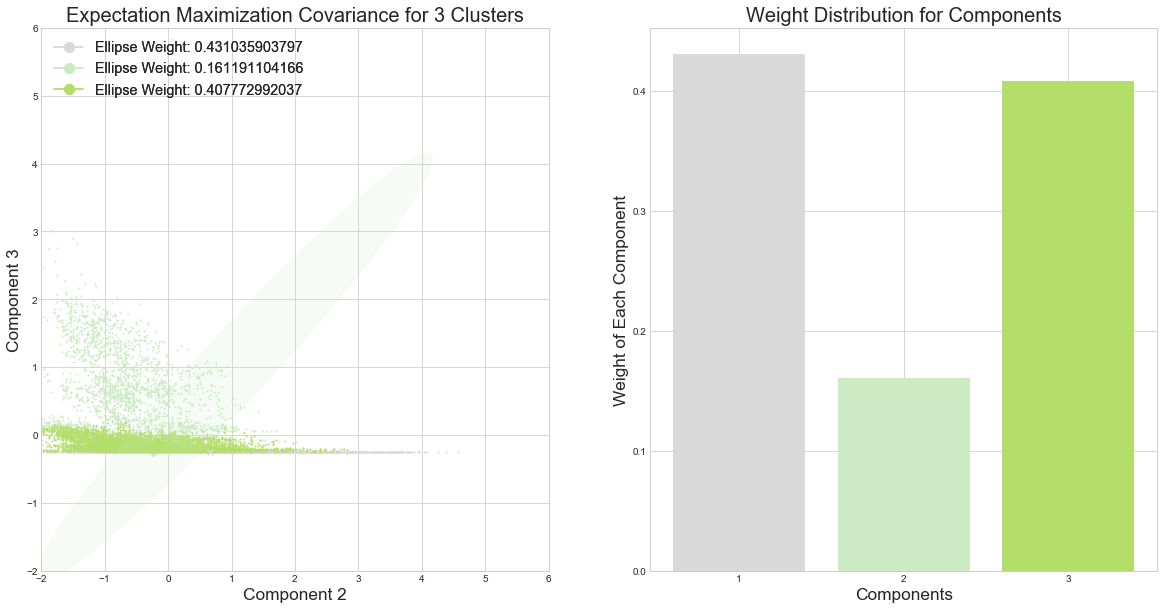

In [106]:
plot_em_covariances('Expectation Maximization Covariance for 3 Clusters', '3_1', 
                    'Component 2', 'Component 3', 3, avoc_clean, EM_learner,
                    [-2,6], [-2,6], 1,2)

3
(7869, 9)
(2931, 9)
(7449, 9)


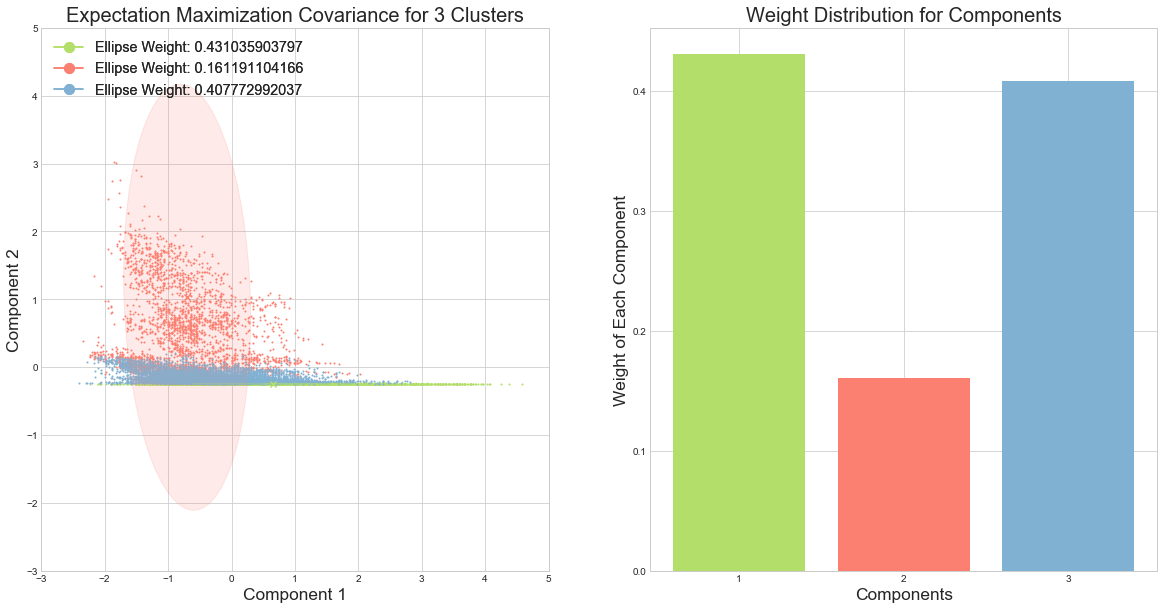

In [119]:
plot_em_covariances('Expectation Maximization Covariance for 3 Clusters', '3', 
                    'Component 1', 'Component 2', 3, avoc_clean, EM_learner,
                    [-3,5], [-3,5],0,1)

2
(10031, 9)
(8218, 9)


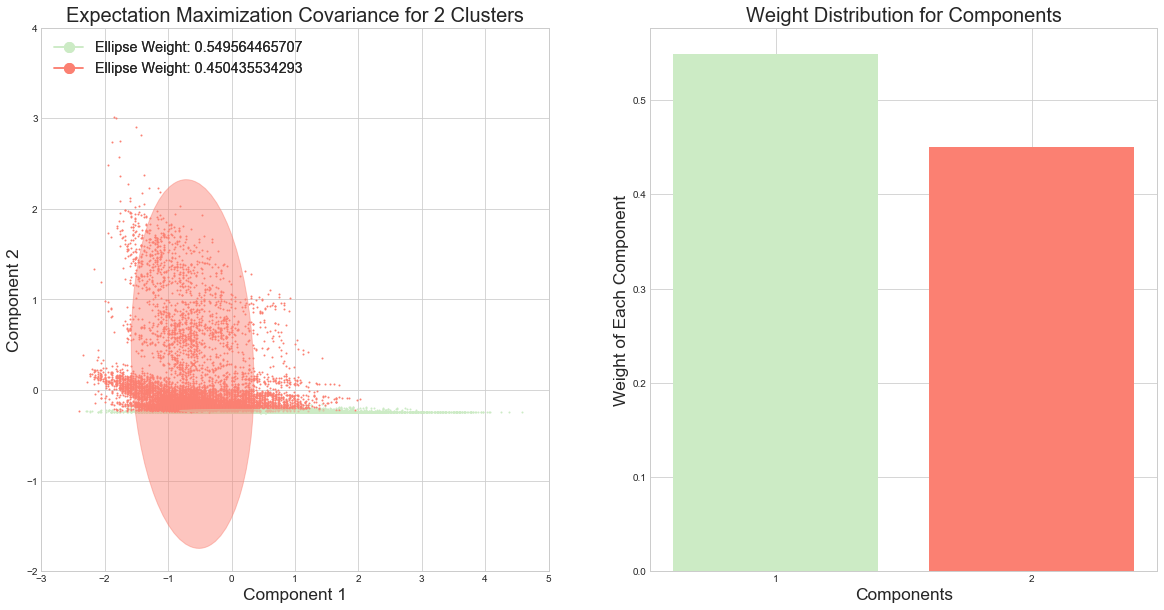

In [116]:
plot_em_covariances('Expectation Maximization Covariance for 2 Clusters', '2', 
                    'Component 1', 'Component 2', 2, avoc_clean, EM_learner,
                    [-3,5], [-2,4],0,1)

##### Redundancy helps us know how our principal components are related.
We can best view redudancy by visualizing the covariances as shown above. If the two components are entirely uncorrelated the variance will have a high spread and a large circle. 
If the components are strongly correlated the circle will be very slender and have a smaller variance. In the picture above component the gray component shows less redundancy than the purple component.

In [980]:
EM_converged

[True, True, True, True, True, True]

## Dimensionality reduction algorithms
- #### PCA - Principal Component Analysis
- #### ICA - Independent Component Analysis
- #### RPA - Randomized Projection Analysis
- #### LDA - L Discriminant Analysis

In [21]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import SparseRandomProjection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.random_projection import GaussianRandomProjection

### __[ PCA - Principal Component Analysis](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)__
- PCA 
- Kmeans after PCA
- EM after PCA

### I.) PCA

In [181]:
%%time
# initialize prediction results
PCA_score_success = []
PCA_success = []

PCA_covariances = []
PCA_means = []
PCA_e_v_ratio = []
PCA_noise_var = []
PCA_learner = []
avocado_PCA = []
# Run PCA and record results
for i in range(1,5,1):
    print("clusters: "+str(i))

    # fit the data
    pca = PCA(n_components=i, random_state=0)
    pca.fit(avoc_clean)#avocado_enc)
    
    PCA_learner.append(pca)
    PCA_score_success.append(pca.score(avoc_clean))#avocado_enc))
    PCA_covariances.append(pca.get_covariance())
    PCA_e_v_ratio.append(pca.explained_variance_ratio_)
    PCA_noise_var.append(pca.noise_variance_)

    avocado_PCA.append(pca.fit_transform(avoc_clean))#avocado_enc)
    # fit data with Cross-Validation
    scores = cross_val_score(pca, avoc_clean, None, cv=fold)
    PCA_success.append(scores.mean())
    

clusters: 1
clusters: 2
clusters: 3
clusters: 4
CPU times: user 4.13 s, sys: 478 ms, total: 4.61 s
Wall time: 1.23 s


In [954]:
pprint([(PCA_learner[3].components_)])

[array([[-0.08189626,  0.37330527,  0.36056445,  0.35941601,  0.33112789,
         0.36984025,  0.36946058,  0.34281609,  0.30707996],
       [ 0.99322885,  0.01728873, -0.0101839 ,  0.02627211,  0.00175385,
         0.04133414,  0.0431337 ,  0.02867878,  0.08949319],
       [-0.07284946, -0.17022428, -0.22404024, -0.34621216, -0.42802941,
         0.16061936,  0.11856376,  0.23450324,  0.71944623],
       [-0.02197877, -0.06658436, -0.10873347,  0.05927812,  0.56401715,
        -0.22752316, -0.14151944, -0.52741656,  0.55827277]])]


In [956]:
pca_components = pd.DataFrame(PCA_learner[3].components_)

In [959]:
pca_components.columns = avoc_clean_data.columns.values

In [960]:
pca_components

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.081896,0.373305,0.360564,0.359416,0.331128,0.369840,0.369461,0.342816,0.307080
1,0.993229,0.017289,-0.010184,0.026272,0.001754,0.041334,0.043134,0.028679,0.089493
2,-0.072849,-0.170224,-0.224040,-0.346212,-0.428029,0.160619,0.118564,0.234503,0.719446
3,-0.021979,-0.066584,-0.108733,0.059278,0.564017,-0.227523,-0.141519,-0.527417,0.558273


In [981]:
PCA_e_v_ratio 

[array([0.78145302]),
 array([0.78145302, 0.10703812]),
 array([0.78145302, 0.10703812, 0.04728972]),
 array([0.78145302, 0.10703812, 0.04728972, 0.03727029])]

4


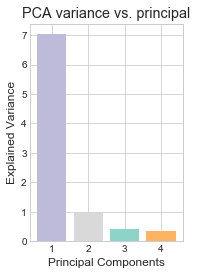

In [971]:
# percentage of variances vs. principal components
PCA_variances = [PCA_learner[i].explained_variance_ for i in range(4)]

bar_plot_exp_var('PCA variance vs. principal', 'pca_variance', 
             'Principal Components', 'Explained Variance',
             PCA_variances[3],4)

##### optimal number of components is determined visually through scree plot.
It does not make sense to go past the 2nd component due to the law of diminishing marginal returns and the variance isn't shifting much thereafter.

4


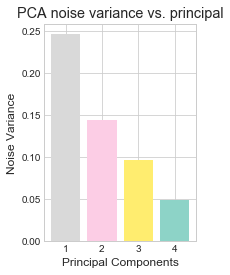

In [964]:
# percentage of noise variance vs. principal components
bar_plot_exp_var('PCA noise variance vs. principal', 'pca_noise_variance', 
             'Principal Components', 'Noise Variance',
             PCA_noise_var, 4)

##### Noise covariance of the PCA model. It is important for noise to be low.
We can check how precise our data is with the plot below: 



In [561]:
[(PCA_learner[3].explained_variance_[i]/PCA_noise_var[i]) for i in range(4)]

[21.336663090504857, 4.830363294556902, 5.938561448373664, 4.405763966823064]

4


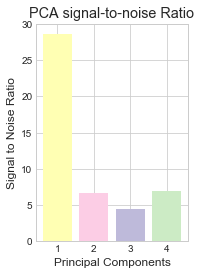

In [970]:
# percentage of noise variance vs. principal components
cluster_i = 3
PCA_SNR = [(PCA_learner[cluster_i].explained_variance_[i]/PCA_noise_var[i]) for i in range(cluster_i+1)]

bar_plot_exp_var('PCA signal-to-noise Ratio', 'pca_snr', 
             'Principal Components', 'Signal to Noise Ratio',
             PCA_SNR, 4)

##### Signal to noise ratio helps indicate the precision of the data.
A high SNR that is much greater than one will indicate high precision data. In our case even for four components the SNR was high.
If our SNR had been low then it would have meant that our data was noise contaminated.

4


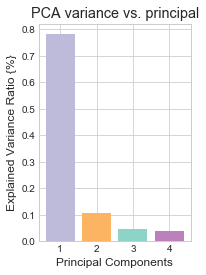

In [969]:
# percentage of explained variance ratio vs. principal components
bar_plot_exp_var('PCA variance vs. principal', 'pca_var_rat', 
             'Principal Components', 'Explained Variance Ratio {%}',
              PCA_e_v_ratio[3], 4)

##### Percentage of variance explained by each of the selected components
This is the percentage explained for 3 components

### II.) Kmeans after PCA

In [982]:
%%time
# Initialize prediction results
km_pca_cm = []
km_pca_i = []
km_pca_l = []
km_pca_s = []
km_pca_ss = []

# run learner
km_pca_learner = run_kmeans(4)

# run kmeans and record results
for i in range(0,len(km_pca_learner)):
    print("components: " + str(i+1))

    # fit the data
    km_pca_learner[i].fit(avocado_PCA[i],None)
    km_pca_ss.append(km_pca_learner[i].score(avocado_PCA[i],None))

    # append means (n_components(i), n_features(dataset))
    km_pca_cm.append(km_pca_learner[i].cluster_centers_)
    km_pca_i.append(km_pca_learner[i].inertia_)
    km_pca_l.append(km_pca_learner[i].labels_)

    # Fit data with Cross-Validation
    scores = cross_val_score(km_pca_learner[i], avocado_PCA[i], None, cv=fold)
    km_pca_s.append(scores.mean())

clusters: 1
clusters: 2
clusters: 3
clusters: 4
components: 1
components: 2
components: 3
components: 4
CPU times: user 17.7 s, sys: 1.34 s, total: 19.1 s
Wall time: 5.24 s


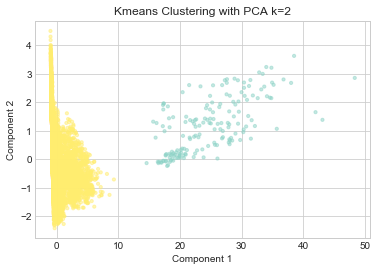

In [984]:
plotScatter('Kmeans Clustering with PCA k=2', 'pca_km_2', 'Component 1', 
            'Component 2', avocado_PCA[1][:,0], avocado_PCA[1][:,1], km_pca_l[1], plt.cm.Set3)

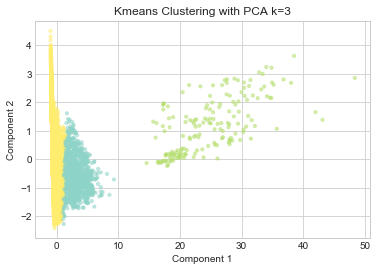

In [987]:
plotScatter('Kmeans Clustering with PCA k=3', 'pca_km_3', 'Component 1', 
            'Component 2', avocado_PCA[2][:,0], avocado_PCA[2][:,1], km_pca_l[2], plt.cm.Set3)

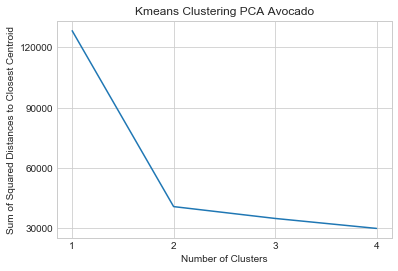

In [990]:
plotLinePlot('Kmeans Clustering PCA Avocado', 'pca_km_inertia', 
             'Number of Clusters', 'Sum of Squared Distances to Closest Centroid',
              range(1,5,1), km_pca_i)

### III.) EM after PCA

In [182]:
%%time
# initialize arrays
em_pca_converged = []
em_pca_covariances = []
em_pca_means = []
em_pca_precision = []
em_pca_success = []
em_pca_ss = []
em_pca_weights = []
em_pca_Y_ = []

# run learner
em_pca_learner = run_expectation_max(4)

for i in range(0, len(em_pca_learner)):
    # fit the data
    em_pca_learner[i].fit(avocado_PCA[i],None)
    em_pca_ss.append(em_pca_learner[i].score(avocado_PCA[i],None))

    # append means (n_components(i), n_features(dataset))
    em_pca_converged.append(em_pca_learner[i].converged_)
    em_pca_covariances.append(em_pca_learner[i].covariances_) # n_components
    em_pca_means.append(em_pca_learner[i].means_)
    em_pca_precision.append(em_pca_learner[i].precisions_)
    em_pca_weights.append(em_pca_learner[i].weights_) # n_components
    em_pca_Y_.append(em_pca_learner[i].predict(avocado_PCA[i]))

    # fit data with Cross-Validation
    scores = cross_val_score(em_pca_learner[i], avocado_PCA[i], None, cv=fold)
    em_pca_success.append(scores.mean())

clusters: 1
clusters: 2
clusters: 3
clusters: 4
CPU times: user 39.3 s, sys: 2.05 s, total: 41.3 s
Wall time: 10.7 s


2
(3032, 2)
(15217, 2)


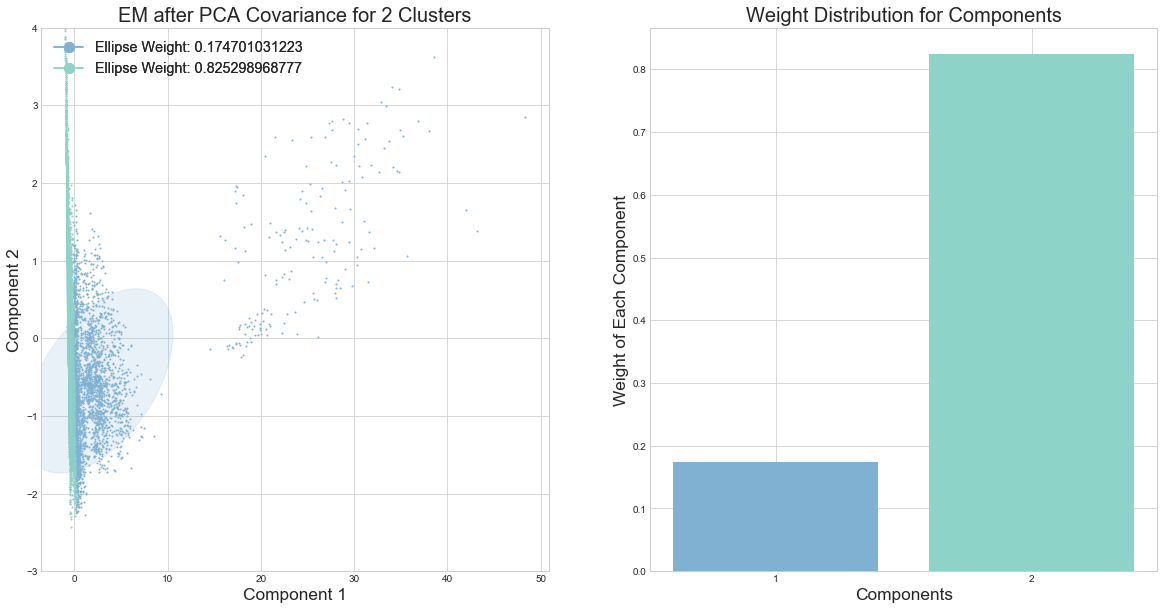

In [996]:
plot_em_covariances('EM after PCA Covariance for 2 Clusters', '2_pca', 'Component 1', 
                    'Component 2', 2, avocado_PCA[1], em_pca_learner, [-3,4], [-3,4],0,1)

3
(6975, 3)
(2395, 3)
(8879, 3)


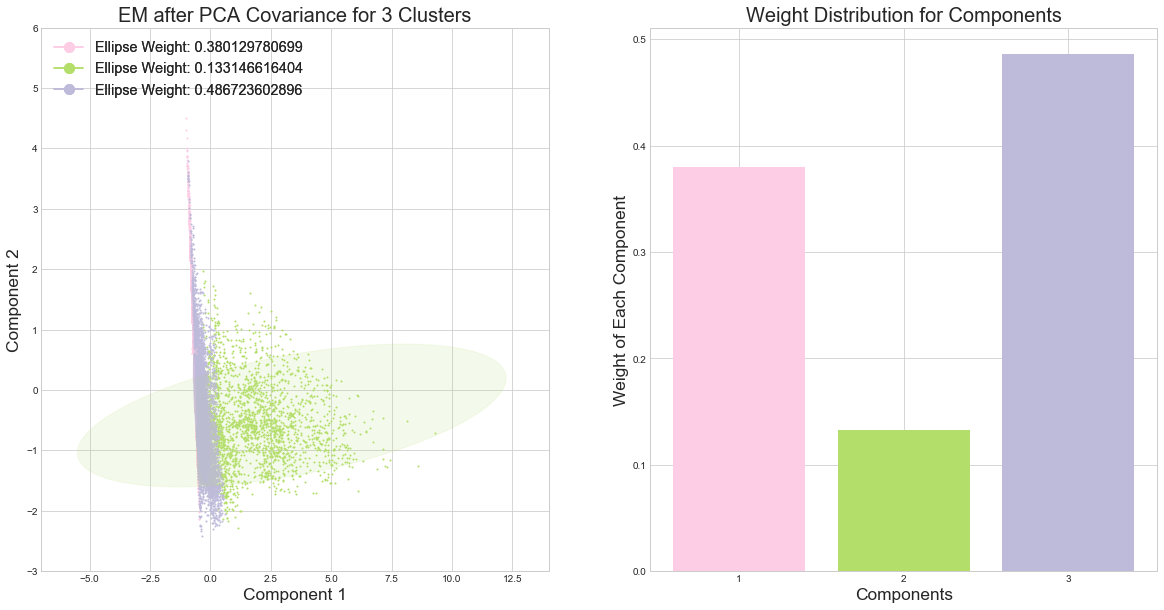

In [191]:
plot_em_covariances('EM after PCA Covariance for 3 Clusters', '3_pca', 'Component 1', 
                    'Component 2', 3, avocado_PCA[2], em_pca_learner, [-7,14], [-3,6],0,1)

In [1001]:
em_pca_converged

[True, True, True, True]

### __[ ICA - Independent Component Analysis](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html)__
- is a recently developed method in which the goal is to find a linear representation of nongaussian data so that the components are statistically independent, or as independent as possible

### I.) ICA

In [214]:
%%time
# Initialize prediction results
ICA_success = []
ICA_unmixing = []
ICA_mixing = []
avocado_ICA = []
ICA_kurtosis = []

# Run ICA and record results
for i in range(1,10,1):
    print("clusters: "+str(i))

    # Fit the data
    ica = FastICA(n_components=i, random_state=0)
    ica.fit(avoc_clean)
    avocado_ICA.append(ica.fit_transform(avoc_clean))

    ICA_unmixing.append(ica.components_)
    ICA_mixing.append(ica.mixing_)

clusters: 1
clusters: 2
clusters: 3
clusters: 4
clusters: 5
clusters: 6
clusters: 7
clusters: 8
clusters: 9
CPU times: user 2.93 s, sys: 215 ms, total: 3.14 s
Wall time: 837 ms


In [252]:
scipy.stats.kurtosis(avocado_ICA[8])

array([1.35602483e+02, 4.38452757e+03, 6.09960945e+01, 3.78031572e+01,
       2.12055045e+02, 2.72834535e+02, 2.40230419e+02, 1.20213166e+02,
       4.08547648e-01])

9


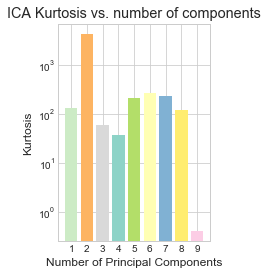

In [269]:
# percentage of explained variance ratio vs. principal components
bar_plot_exp_var('ICA Kurtosis vs. number of components', 'ica_kurt', 
             'Number of Principal Components', 'Kurtosis',
              scipy.stats.kurtosis(avocado_ICA[8]),9)

In [215]:
import scipy.stats
pprint(scipy.stats.kurtosis(avocado_enc))

array([  0.32477799,  92.07889546,  86.785001  ,  91.92350224,
       132.52679414, 112.24106888, 106.9832384 , 117.96682436,
       233.53828378,  -1.30551983,  -1.3059842 ,  -1.35395714,
         9.15746517,  49.00999535,  49.00999535,  49.00999535,
        49.00999535,  49.00999535,  49.00999535,  49.00999535,
        49.00999535,  49.00999535,  49.00999535,  49.00999535,
        49.00999535,  49.00999535,  49.00999535,  49.00999535,
        49.00999535,  49.00999535,  49.00999535,  49.00999535,
        49.00999535,  49.00999535,  49.00999535,  49.00999535,
        49.00999535,  49.00999535,  49.00999535,  49.00999535,
        49.00999535,  49.00999535,  49.00999535,  49.00999535,
        49.00999535,  49.00999535,  49.00999535,  49.00999535,
        49.00999535,  49.00999535,  49.00999535,  49.00999535,
        49.00999535,  49.00999535,  49.00999535,  49.00999535,
        49.00999535,  49.00999535,  49.00999535,  49.00999535,
        49.00999535,  49.00999535,  49.00999535,  49.00

##### __[Kurtosis](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.kurtosis.html)__  can be both positive or negative. Random variables that have a negative kurtosis are called subgaussian, and those with positive kurtosis are called supergaussian.
    - subgaussian-uniform
    - supergaussian-really spiky top
Typically nongaussianity is measured by the absolute value of kurtosis. The square of kurtosis can also be
used. These are zero for a gaussian variable, and greater than zero for most nongaussian random variables. There
are nongaussian random variables that have zero kurtosis, but they can be considered as very rare.
+ However, kurtosis has also some drawbacks in practice, when its value has to be estimated from a measured
sample. The main problem is that kurtosis can be very sensitive to outliers (Huber, 1985). Its value may depend on
only a few observations in the tails of the distribution, which may be erroneous or irrelevant observations. In other
words, kurtosis is not a robust measure of nongaussianity.



### II.) kmeans after ICA

In [1002]:
%%time
# Initialize prediction results
km_ica_ss = []
km_ica_s = []
km_ica_cm = []
km_ica_l = []
km_ica_i = []

# run learner
km_ica_learner = run_kmeans(6)

# run kmeans and record results
for i in range(0,len(km_ica_learner)):
    # fit the data
    km_ica_learner[i].fit(avocado_ICA[i],None)
    km_ica_ss.append(km_ica_learner[i].score(avocado_ICA[i],None))

    # append means (n_components(i), n_features(dataset))
    km_ica_cm.append(km_ica_learner[i].cluster_centers_)
    km_ica_i.append(km_ica_learner[i].inertia_)
    km_ica_l.append(km_ica_learner[i].labels_)

    # fit data with Cross-Validation
    scores = cross_val_score(km_ica_learner[i], avocado_ICA[i], None, cv=fold)
    km_ica_s.append(scores.mean())

clusters: 1
clusters: 2
clusters: 3
clusters: 4
clusters: 5
clusters: 6
CPU times: user 43.3 s, sys: 3.12 s, total: 46.5 s
Wall time: 14.1 s


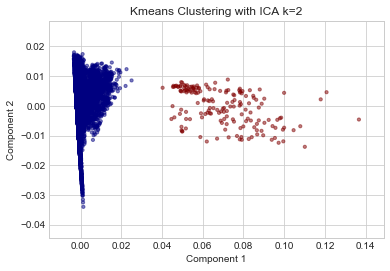

In [1004]:
plotScatter('Kmeans Clustering with ICA k=2', 'ica_km_2', 'Component 1', 
            'Component 2', avocado_ICA[1][:,0], avocado_ICA[1][:,1], km_ica_l[1], plt.cm.jet)

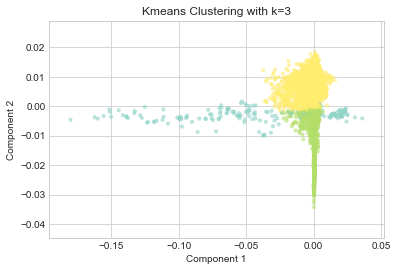

In [1005]:
plotScatter('Kmeans Clustering with k=3', 'ica_km_3', 'Component 1', 
            'Component 2', avocado_ICA[2][:,0], avocado_ICA[2][:,1], km_ica_l[2], plt.cm.Set3)

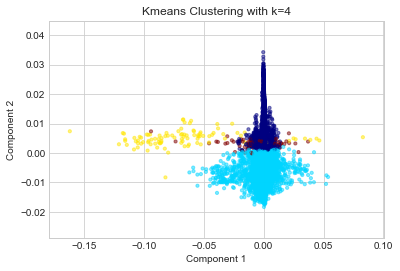

In [1006]:
plotScatter('Kmeans Clustering with k=4', 'ica_km_4', 'Component 1', 
            'Component 2', avocado_ICA[3][:,0], avocado_ICA[3][:,1], km_ica_l[3], plt.cm.jet)

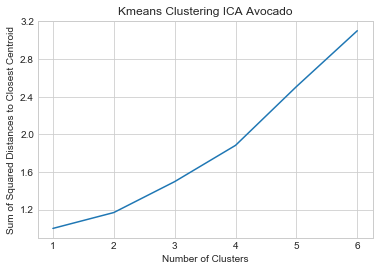

In [1007]:
plotLinePlot('Kmeans Clustering ICA Avocado', 'ica_km_inertia', 
             'Number of Clusters', 'Sum of Squared Distances to Closest Centroid',
              range(1,7,1), km_ica_i)

### III.) EM after ICA

In [216]:
%%time
# initialize arrays
em_ica_converged = []
em_ica_covariances = []
em_ica_means = []
em_ica_precision = []
em_ica_success = []
em_ica_ss = []
em_ica_weights = []
em_ica_Y_ = []

# run learner
em_ica_learner = run_expectation_max(6)

for i in range(0,len(em_ica_learner)):
    # fit the data
    em_ica_learner[i].fit(avocado_ICA[i],None)
    em_ica_ss.append(em_ica_learner[i].score(avocado_ICA[i],None))

    # append means (n_components(i), n_features(dataset))
    em_ica_converged.append(em_ica_learner[i].converged_)
    em_ica_covariances.append(em_ica_learner[i].covariances_) # n_components
    em_ica_means.append(em_ica_learner[i].means_)
    em_ica_precision.append(em_ica_learner[i].precisions_)
    em_ica_weights.append(em_ica_learner[i].weights_) # n_components
    em_ica_Y_.append(em_ica_learner[i].predict(avocado_ICA[i]))

    # fit data with Cross-Validation
    scores = cross_val_score(em_ica_learner[i], avocado_ICA[i], None, cv=fold)
    em_ica_success.append(scores.mean())


clusters: 1
clusters: 2
clusters: 3
clusters: 4
clusters: 5
clusters: 6
CPU times: user 39 s, sys: 2.32 s, total: 41.3 s
Wall time: 10.8 s


2
(1474, 2)
(16775, 2)


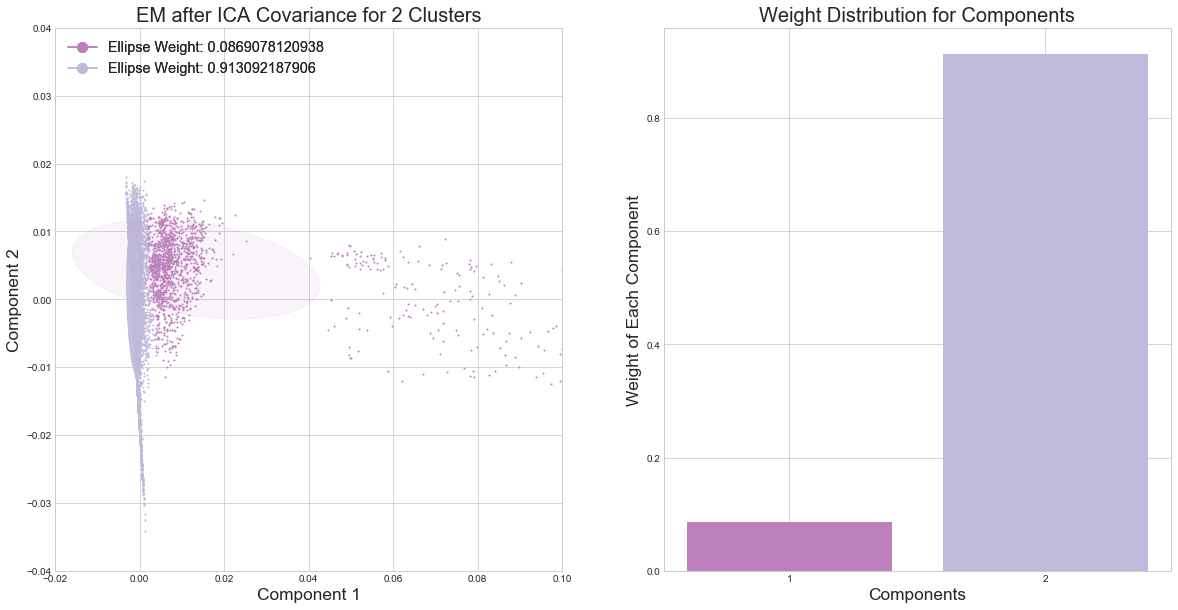

In [206]:
plot_em_covariances('EM after ICA Covariance for 2 Clusters', '2_ica', 'Component 1', 
                    'Component 2', 2, avocado_ICA[1], em_ica_learner, [-.02,.1], [-.04,.04],0,1)

3
(16291, 3)
(1789, 3)
(169, 3)


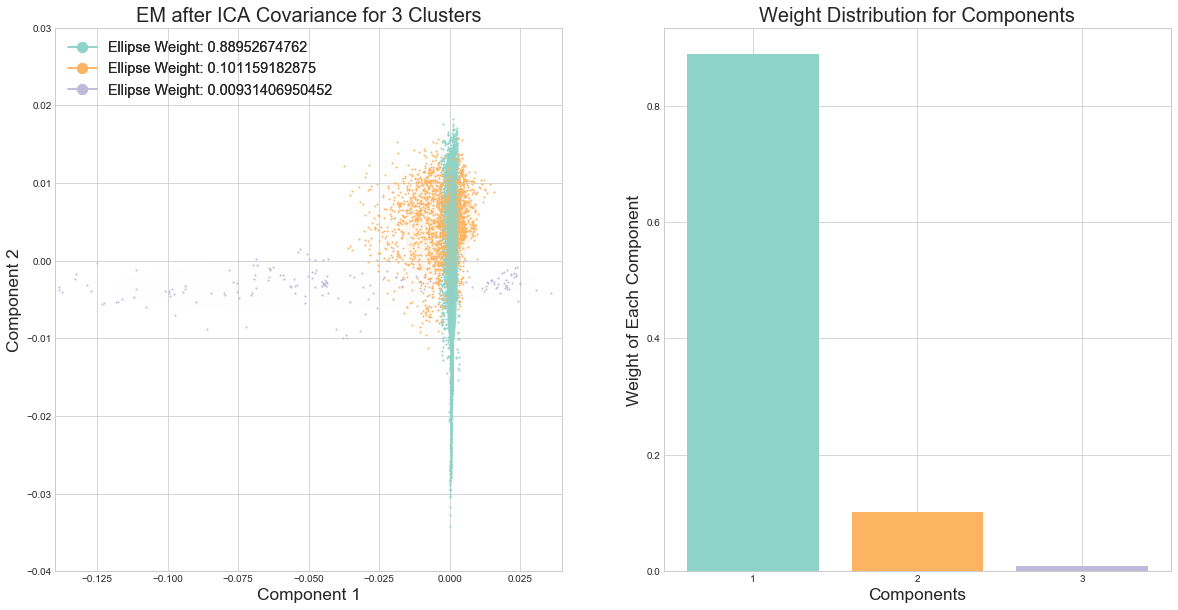

In [221]:
plot_em_covariances('EM after ICA Covariance for 3 Clusters', '3_ica', 'Component 1', 
                    'Component 2', 3, avocado_ICA[2], em_ica_learner, [-0.14,0.04], [-0.04,0.03],0,1)

4
(2014, 4)
(15721, 4)
(431, 4)
(83, 4)


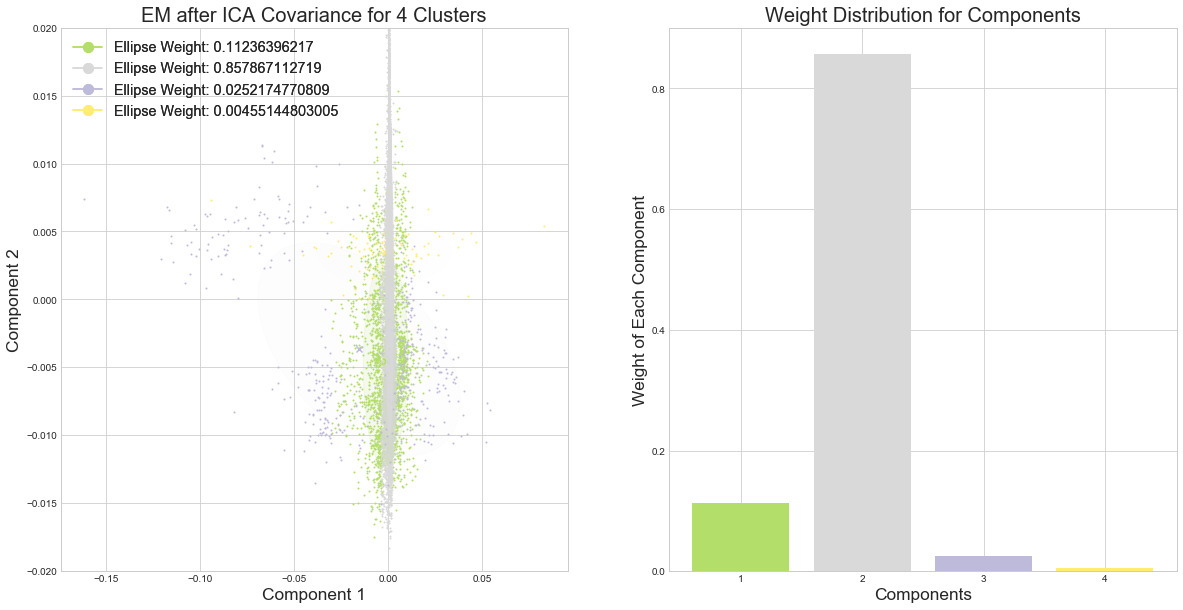

In [1013]:
plot_em_covariances('EM after ICA Covariance for 4 Clusters', '4_ica', 'Component 1', 
                    'Component 2', 4, avocado_ICA[3], em_ica_learner, [-0.02,0.02],0,1)

In [1014]:
em_ica_converged

[True, True, True, True, True, True]

### __[ RPA - Randomized Projections Analysis](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.random_projection)__

### I.) RPA

In [222]:
%%time
# Initialize prediction results
RPA_components = []
RPA_density = []
RPA_mean = []

avocado_RPA = []

for i in range(1,10,1):
    # run RPA
    print("components: "+str(i))
    rpa = SparseRandomProjection(n_components=i, random_state=0)
    avocado_RPA.append(rpa.fit_transform(avoc_clean))
    RPA_components.append(rpa.components_)
    RPA_density.append(rpa.density_)
    RPA_mean.append(np.mean(rpa.components_ != 0))

components: 1
components: 2
components: 3
components: 4
components: 5
components: 6
components: 7
components: 8
components: 9
CPU times: user 28.1 ms, sys: 9.82 ms, total: 37.9 ms
Wall time: 34 ms


In [1018]:
# if the mean is low it means very few components are non-zero
RPA_mean

[0.3333333333333333,
 0.3333333333333333,
 0.37037037037037035,
 0.3611111111111111,
 0.3555555555555555,
 0.37037037037037035,
 0.3333333333333333,
 0.33333333333333326,
 0.32098765432098764]

In [1019]:
RPA_density

[0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333]

### II.) kmeans after RPA

In [1020]:
%%time
# Initialize prediction results
km_rpa_ss = []
km_rpa_s = []
km_rpa_cm = []
km_rpa_l = []
km_rpa_i = []

# run learner
km_rpa_learner = run_kmeans(9)

# run kmeans and record results
for i in range(0,len(km_rpa_learner)):
    print("cluster: " + str(i))
    # fit the data
    km_rpa_learner[i].fit(avocado_RPA[i],None)
    km_rpa_ss.append(km_rpa_learner[i].score(avocado_RPA[i],None))

    # append means (n_components(i), n_features(dataset))
    km_rpa_cm.append(km_rpa_learner[i].cluster_centers_)
    km_rpa_i.append(km_rpa_learner[i].inertia_)
    km_rpa_l.append(km_rpa_learner[i].labels_)


    # fit data with Cross-Validation
    scores = cross_val_score(km_rpa_learner[i], avocado_RPA[i], None, cv=fold)
    km_rpa_s.append(scores.mean())


clusters: 1
clusters: 2
clusters: 3
clusters: 4
clusters: 5
clusters: 6
clusters: 7
clusters: 8
clusters: 9
CPU times: user 1min 25s, sys: 5.07 s, total: 1min 30s
Wall time: 29.8 s


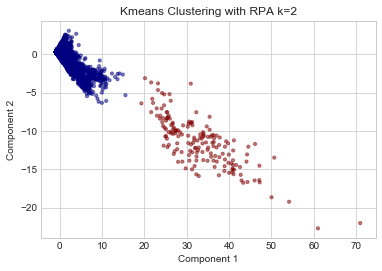

In [1022]:
plotScatter('Kmeans Clustering with RPA k=2', 'rpa_km_2', 'Component 1', 
            'Component 2', avocado_RPA[1][:,0], avocado_RPA[1][:,1], km_rpa_l[1], plt.cm.jet)

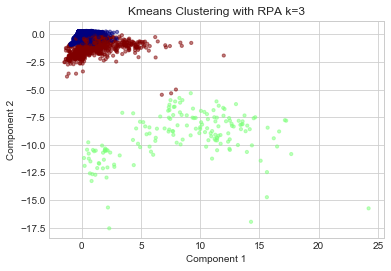

In [1023]:
plotScatter('Kmeans Clustering with RPA k=3', 'rpa_km_3', 'Component 1', 
            'Component 2', avocado_RPA[2][:,0], avocado_RPA[2][:,1], km_rpa_l[2], plt.cm.jet)

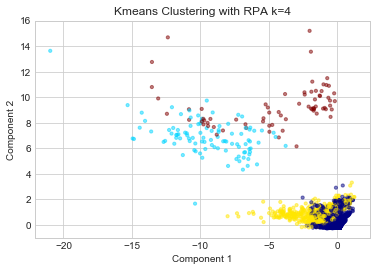

In [1024]:
plotScatter('Kmeans Clustering with RPA k=4', 'rpa_km_4', 'Component 1', 
            'Component 2', avocado_RPA[3][:,0], avocado_RPA[3][:,1], km_rpa_l[3], plt.cm.jet)

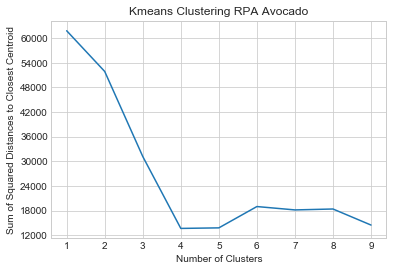

In [1026]:
plotLinePlot('Kmeans Clustering RPA Avocado', 'rpa_km_inertia', 
             'Number of Clusters', 'Sum of Squared Distances to Closest Centroid',
              range(1,10,1), km_rpa_i)

### III.) EM after RPA

In [223]:
%%time
# initialize arrays
em_rpa_converged = []
em_rpa_covariances = []
em_rpa_means = []
em_rpa_precision = []
em_rpa_success = []
em_rpa_ss = []
em_rpa_weights = []
em_rpa_Y_ = []

# run learner
em_rpa_learner = run_expectation_max(5)

for i in range(0,len(em_rpa_learner)):
    # print the data
    print("component: " + str(i))
    em_rpa_learner[i].fit(avocado_RPA[i],None)
    em_rpa_ss.append(em_rpa_learner[i].score(avocado_RPA[i],None))

    # append means (n_components(i), n_features(dataset))
    em_rpa_converged.append(em_rpa_learner[i].converged_)
    em_rpa_covariances.append(em_rpa_learner[i].covariances_) # n_components
    em_rpa_means.append(em_rpa_learner[i].means_)
    em_rpa_precision.append(em_rpa_learner[i].precisions_)
    em_rpa_weights.append(em_rpa_learner[i].weights_) # n_components
    em_rpa_Y_.append(em_rpa_learner[i].predict(avocado_RPA[i]))

    # fit data with Cross-Validation
    scores = cross_val_score(em_rpa_learner[i], avocado_RPA[i], None, cv=fold)
    em_rpa_success.append(scores.mean())


clusters: 1
clusters: 2
clusters: 3
clusters: 4
clusters: 5
component: 0
component: 1
component: 2
component: 3
component: 4


/Users/Connie/anaconda/envs/py2/lib/python2.7/site-packages/sklearn/mixture/base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/Connie/anaconda/envs/py2/lib/python2.7/site-packages/sklearn/mixture/base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


CPU times: user 1min 17s, sys: 3.91 s, total: 1min 21s
Wall time: 21.1 s


2
(12774, 2)
(5475, 2)


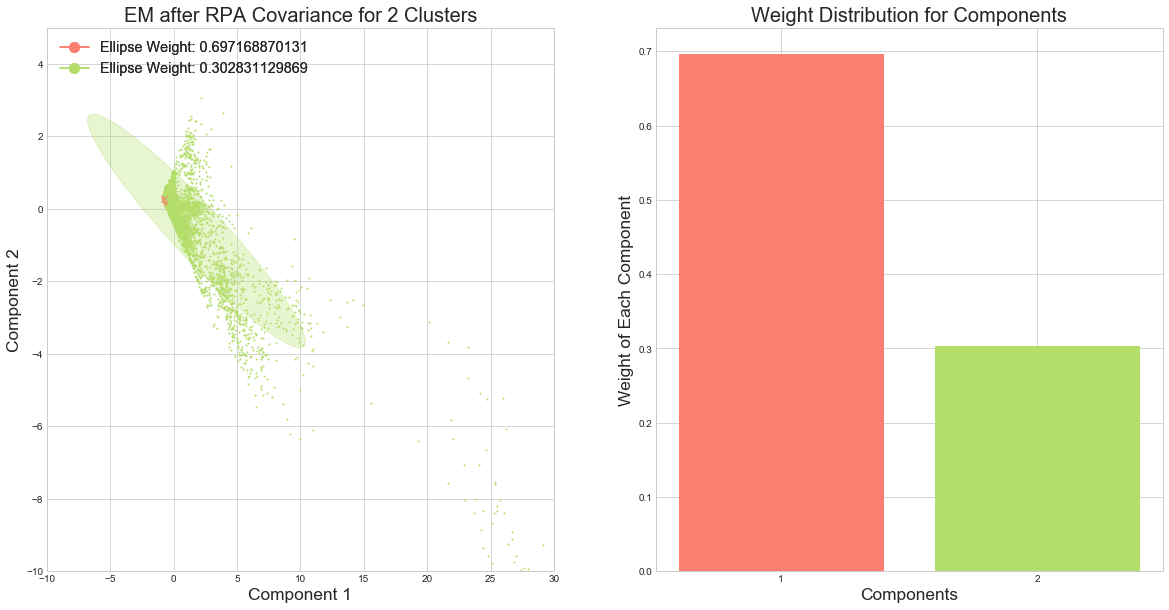

In [233]:
plot_em_covariances('EM after RPA Covariance for 2 Clusters', '2_rpa', 'Component 1', 
                    'Component 2', 2, avocado_RPA[1], em_rpa_learner, 
                    [-10,30], [-10,5],0,1)

3
(7047, 3)
(2939, 3)
(8263, 3)


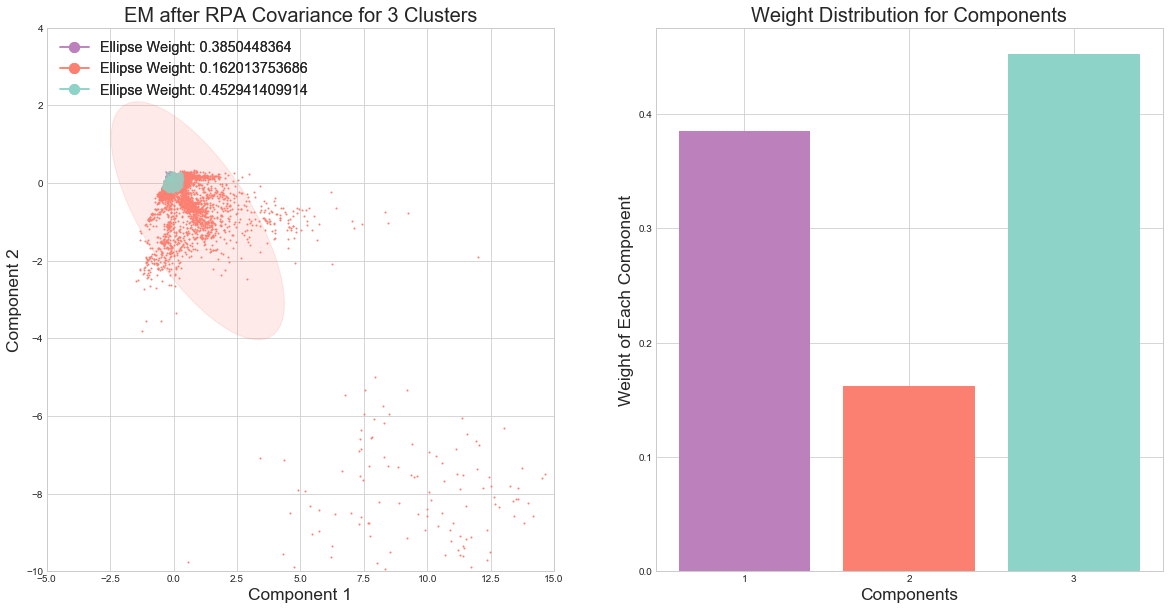

In [230]:
plot_em_covariances('EM after RPA Covariance for 3 Clusters', '3_rpa', 'Component 1', 
                    'Component 2', 3, avocado_RPA[2], em_rpa_learner, 
                    [-5,15], [-10,4],0,1)

In [1052]:
em_rpa_ss

[-2.0285842820126856,
 0.14681329334429102,
 3.695487662908462,
 6.558764230360201,
 11.275182160816609]

In [1053]:
em_rpa_converged

[True, True, True, True, True]

### __[ LDA- Linear Discriminant Analysis](http://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html)__

### I.) LDA

In [234]:
%%time
# Initialize prediction results
LDA_classes = []
LDA_exp_var_rat = []
LDA_means = []
LDA_xbar = []
LDA_score_success = []
LDA_success = []
LDA_covariance = []
LDA_coef = []

avocado_LDA = []

# LDA
for i in range(1,3,1):
    # run lda
    print("components: "+str(i))
    lda = LinearDiscriminantAnalysis(n_components=i, store_covariance=True)

    lda.fit(avoc_clean,avocado_labels_enc)

    avocado_LDA.append(lda.transform(avoc_clean))
    LDA_score_success.append(lda.score(avoc_clean, avocado_labels_enc, None))
    LDA_classes.append(lda.classes_)
    LDA_covariance.append(lda.covariance_)
    LDA_exp_var_rat.append(lda.explained_variance_ratio_)
    LDA_means.append(lda.means_)
    LDA_xbar.append(lda.xbar_)
    LDA_coef.append(lda.coef_)
    # Fit data with Cross-Validation
    # scores = cross_val_score(lda, avocado_enc, None, cv=fold)
    # LDA_success.append(scores.mean())


components: 1
components: 2
CPU times: user 233 ms, sys: 10.2 ms, total: 243 ms
Wall time: 87.3 ms


/Users/Connie/anaconda/envs/py2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/Connie/anaconda/envs/py2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [1069]:
LDA_coef[0]

array([[ 2.01303431, -0.13207161,  0.49616901, -0.91018531,  0.24460804,
        -0.01639862, -0.08450717,  0.20446325, -0.20036776]])

In [1070]:
LDA_coef[1]

array([[ 2.01303431, -0.13207161,  0.49616901, -0.91018531,  0.24460804,
        -0.01639862, -0.08450717,  0.20446325, -0.20036776]])

In [358]:
LDA_score_success

[0.8696366924215025]

In [359]:
LDA_exp_var_rat

[array([1.])]

In [787]:
avocado_LDA[0].shape

(18249, 1)

In [365]:
LDA_covariance

[array([[ 0.62073507, -0.04960883, -0.06924784, ..., -0.02967911,
         -0.04564686, -0.04825769],
        [-0.04960883,  0.94597424,  0.92537515, ...,  0.6563718 ,
          0.09406793, -0.01688029],
        [-0.06924784,  0.92537515,  0.94900598, ...,  0.62842997,
          0.09625084, -0.0048153 ],
        ...,
        [-0.02967911,  0.6563718 ,  0.62842997, ...,  1.        ,
         -0.01887109, -0.01878555],
        [-0.04564686,  0.09406793,  0.09625084, ..., -0.01887109,
          1.        , -0.01878555],
        [-0.04825769, -0.01688029, -0.0048153 , ..., -0.01878555,
         -0.01878555,  0.99999855]])]

In [1060]:
LDA_classes

[array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1])]

### II.) kmeans after LDA

In [27]:
%%time
# Initialize prediction results
km_lda_ss = []
km_lda_s = []
km_lda_cm = []
km_lda_l = []
km_lda_i = []

# run learner
km_lda_learner = run_kmeans(2)

# run kmeans and record results
for i in range(0,len(km_lda_learner)):
    # fit the data
    km_lda_learner[i].fit(avocado_LDA[i],None)
    km_lda_ss.append(km_lda_learner[i].score(avocado_LDA[i],None))

    # append means (n_components(i), n_features(dataset))
    km_lda_cm.append(km_lda_learner[i].cluster_centers_)
    km_lda_i.append(km_lda_learner[i].inertia_)
    km_lda_l.append(km_lda_learner[i].labels_)
    
    # fit data with Cross-Validation
    scores = cross_val_score(km_lda_learner[i], avocado_LDA[i], None, cv=fold)
    km_lda_s.append(scores.mean())


clusters: 1
clusters: 2
CPU times: user 5.54 s, sys: 391 ms, total: 5.93 s
Wall time: 1.58 s


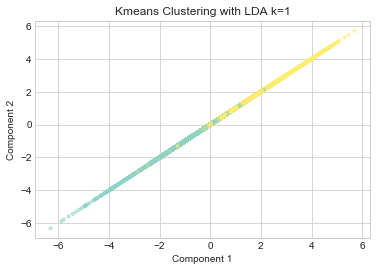

In [1082]:
plotScatter('Kmeans Clustering with LDA k=1', 'lda_km_1', 'Component 1', 
            'Component 2', avocado_LDA[0][:,0], avocado_LDA[0][:,0], avocado_labels_enc, plt.cm.Set3)

In [1079]:
max(avocado_LDA[0][:,0])

5.696810927114904

(array([  1.,   0.,   0.,   1.,   1.,   1.,   0.,   1.,   1.,   1.,   2.,
          4.,   2.,   0.,   4.,   2.,   4.,   4.,   6.,   9.,   8.,   8.,
          9.,   7.,  10.,   8.,  15.,  13.,   8.,  15.,  20.,  36.,  49.,
         91., 109., 166., 228., 261., 341., 361., 449., 536., 694., 727.,
        673., 657., 634., 627., 663., 624., 552., 625., 584., 663., 633.,
        635., 634., 576., 472., 488., 434., 399., 396., 453., 365., 322.,
        279., 208., 210., 186., 142., 110., 108.,  91.,  75.,  70.,  84.,
         64.,  39.,  35.,  23.,  21.,  33.,  26.,  17.,  11.,  18.,  14.,
         10.,  17.,  13.,   8.,   5.,   4.,   3.,   0.,   1.,   0.,   1.,
          1.]),
 array([-6.30473367, -6.18471822, -6.06470278, -5.94468733, -5.82467188,
        -5.70465644, -5.58464099, -5.46462555, -5.3446101 , -5.22459465,
        -5.10457921, -4.98456376, -4.86454832, -4.74453287, -4.62451742,
        -4.50450198, -4.38448653, -4.26447109, -4.14445564, -4.02444019,
        -3.90442475, -3.78

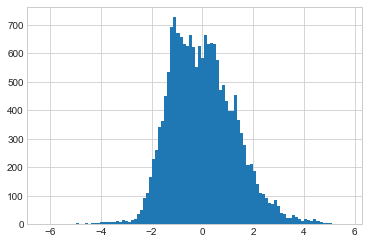

In [1075]:
plt.hist(avocado_LDA[0][:,0], bins = 100)

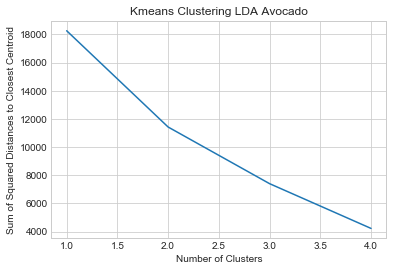

In [782]:
plotLinePlot('Kmeans Clustering LDA Avocado', 'avocado_kmeans_lda_inertia', 
             'Number of Clusters', 'Sum of Squared Distances to Closest Centroid',
              range(1,5,1), km_lda_i)

### III.) EM after LDA

In [235]:
%%time
# initialize arrays
em_lda_covariances = []
em_lda_converged = []
em_lda_means = []
em_lda_precision = []
em_lda_success = []
em_lda_ss = []
em_lda_weights = []
em_lda_Y_ = []

# run learner
em_lda_learner = run_expectation_max(2)

for i in range(0,len(em_lda_learner)):
    # fit the data
    em_lda_learner[i].fit(avocado_LDA[i],None)
    em_lda_ss.append(em_lda_learner[i].score(avocado_LDA[i],None))

    # append means (n_components(i), n_features(dataset))
    em_lda_converged.append(em_lda_learner[i].converged_)
    em_lda_covariances.append(em_lda_learner[i].covariances_) # n_components
    em_lda_means.append(em_lda_learner[i].means_)
    em_lda_precision.append(em_lda_learner[i].precisions_)
    em_lda_weights.append(em_lda_learner[i].weights_) # n_components
    em_lda_Y_.append(em_lda_learner[i].predict(avocado_LDA[i]))

    # fit data with Cross-Validation
    scores = cross_val_score(em_lda_learner[i], avocado_LDA[i], None, cv=fold)
    em_lda_success.append(scores.mean())


clusters: 1
clusters: 2
CPU times: user 1.8 s, sys: 148 ms, total: 1.95 s
Wall time: 516 ms


In [30]:
em_lda_covariances

[array([[[1.66803865]]]), array([[[0.81224109]],
 
        [[1.34857625]]])]

In [31]:
em_lda_converged

[True, True]

In [32]:
em_lda_means

[array([[-1.61584325e-16]]), array([[-0.69016315],
        [ 0.90343756]])]

In [237]:
avocado_LDA[1]

array([[ 1.14527019],
       [ 0.64195748],
       [ 0.77815087],
       ...,
       [-1.22950702],
       [ 0.53376782],
       [ 0.90100799]])

In [41]:
em_lda_learner

[GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
         means_init=None, n_components=1, n_init=1, precisions_init=None,
         random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
         verbose_interval=10, warm_start=False, weights_init=None),
 GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
         means_init=None, n_components=2, n_init=1, precisions_init=None,
         random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
         verbose_interval=10, warm_start=False, weights_init=None)]

0


ValueError: shape mismatch: objects cannot be broadcast to a single shape

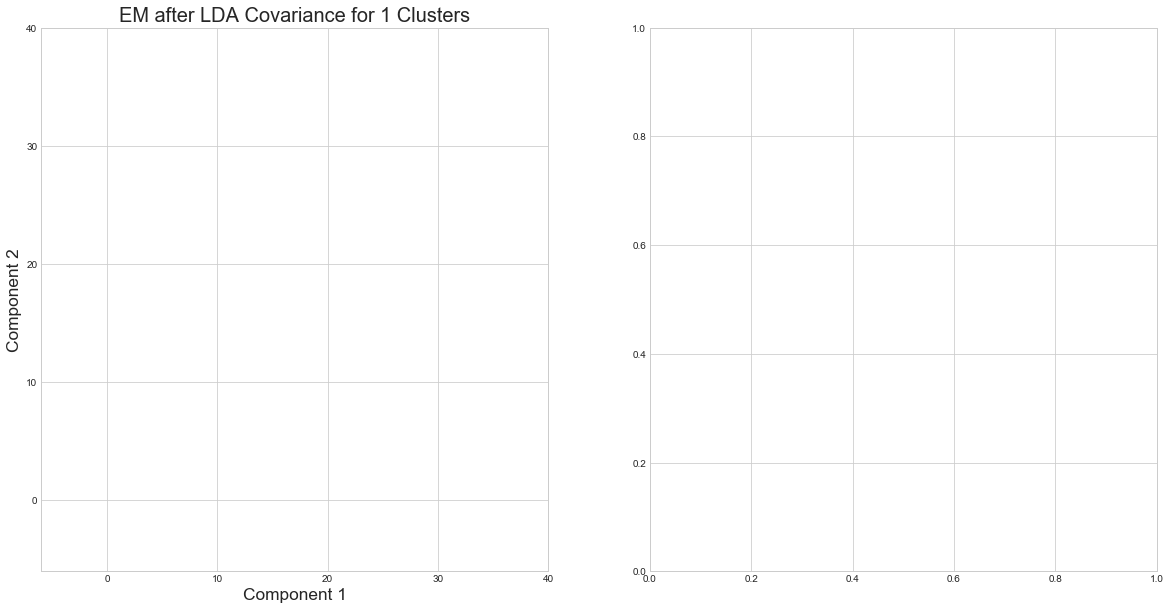

In [241]:
plot_em_covariances('EM after LDA Covariance for 1 Clusters', '1_lda', 'Component 1', 
                    'Component 2', 1, avocado_LDA[1], em_lda_learner, [-6,40], [-6,40], 0, 0)

In [242]:
em_lda_ss

[-1.6747624701741477, -1.6653628147942674]

In [243]:
em_lda_converged

[True, True]

### Neural Network

#### Data w/o Categorical

In [56]:
nn_full_ss = []
nn_full_s = []

clf = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5, 
                        hidden_layer_sizes=(3,3), 
                        random_state=1)

# Fit the data
clf.fit(avoc_clean, avocado_labels_enc)
nn_full_ss.append(clf.score(avoc_clean, avocado_labels_enc))


# Fit data with Cross-Validation
scores = cross_val_score(clf, avoc_clean, avocado_labels_enc, cv=fold)
nn_full_s.append(scores.mean())

#### Reduced Data
   - pca
        - Kmeans
        - Expectaion Maximization
   - ica
        - Kmeans
        - Expectaion Maximization
   - rpa
        - Kmeans
        - Expectaion Maximization
   - lda
        - Kmeans
        - Expectaion Maximization

#### I.) PCA

In [149]:
nn_pca_ss = []
nn_pca_s = []

clf = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5, 
                        hidden_layer_sizes=(3,3), 
                        random_state=1)

# Fit the data
clf.fit(avocado_PCA[1], avocado_labels_enc)
nn_pca_ss.append(clf.score(avocado_PCA[1], avocado_labels_enc))


# Fit data with Cross-Validation
scores = cross_val_score(clf, avocado_PCA[1], avocado_labels_enc, cv=fold)
nn_pca_s.append(scores.mean())


a.) Kmeans

In [150]:
%%time
# initialize prediction results
km_pca_l = []

# run learner
km_pca_learn = run_kmeans(2)

# run kmeans and record results
for i in range(0,len(km_pca_learn)):
    # fit the data
    print("clusters: " + str(i))
    km_pca_learn[i].fit(avocado_PCA[i],None)

    km_pca_l.append(km_pca_learn[i].labels_)

# generate new array with labels from kmeans added
avoc_pca_km = np.append(avocado_PCA[1], km_pca_l[1].reshape(-1,1),1)

clusters: 1
clusters: 2
clusters: 0
clusters: 1
CPU times: user 332 ms, sys: 36.9 ms, total: 368 ms
Wall time: 100 ms


In [151]:
nn_km_pca_ss = []
nn_km_pca_s = []

clf = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5, 
                        hidden_layer_sizes=(3,3), 
                        random_state=1)

# Fit the data
clf.fit(avoc_pca_km, avocado_labels_enc)
nn_km_pca_ss.append(clf.score(avoc_pca_km, avocado_labels_enc))


# Fit data with Cross-Validation
scores = cross_val_score(clf, avoc_pca_km, avocado_labels_enc, cv=fold)
nn_km_pca_s.append(scores.mean())

In [152]:
nn_km_pca_s

[0.9215305971542985]

 b.) Expectation Maximization

In [153]:
%%time
# Initialize prediction results
em_pca_l = []

# run learner
em_pca_learn = run_expectation_max(2)
 
for i in range(0,len(em_pca_learn)):
    # fit the data
    print("components: " + str(i))
    em_pca_learn[i].fit(avocado_PCA[i],None)
    
    em_pca_l.append(em_pca_learn[i].predict(avocado_PCA[i]))

# generate new array with labels from em added
avoc_pca_em = np.append(avocado_PCA[1], em_pca_l[1].reshape(-1,1),1)

clusters: 1
clusters: 2
components: 0
components: 1
CPU times: user 600 ms, sys: 20.8 ms, total: 620 ms
Wall time: 167 ms


In [154]:
nn_em_ss = []
nn_em_s = []

clf = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5, 
                        hidden_layer_sizes=(3,3), 
                        random_state=1)

# Fit the data
clf.fit(avoc_pca_em, avocado_labels_enc)
nn_em_ss.append(clf.score(avoc_pca_em, avocado_labels_enc))


# Fit data with Cross-Validation
scores = cross_val_score(clf, avoc_pca_em, avocado_labels_enc, cv=fold)
nn_em_s.append(scores.mean())

In [155]:
nn_em_s

[0.9211470653868012]

#### II.) ICA

In [156]:
nn_ica_ss = []
nn_ica_s = []

clf = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5, 
                        hidden_layer_sizes=(3,3), 
                        random_state=1)

# Fit the data
clf.fit(avocado_ICA[1], avocado_labels_enc)
nn_ica_ss.append(clf.score(avocado_ICA[1], avocado_labels_enc))


# Fit data with Cross-Validation
scores = cross_val_score(clf, avocado_ICA[1], avocado_labels_enc, cv=fold)
nn_ica_s.append(scores.mean())

a.) Kmeans

In [157]:
%%time
# initialize prediction results
km_ica_l = []

# run learner
km_ica_learn = run_kmeans(2)

# run kmeans and record results
for i in range(0,len(km_ica_learn)):
    # fit the data
    print("clusters: " + str(i))
    km_ica_learn[i].fit(avocado_ICA[i],None)

    km_ica_l.append(km_ica_learn[i].labels_)

# generate new array with labels from kmeans added
avoc_ica_km = np.append(avocado_ICA[1], km_ica_l[1].reshape(-1,1),1)

clusters: 1
clusters: 2
clusters: 0
clusters: 1
CPU times: user 509 ms, sys: 43.4 ms, total: 552 ms
Wall time: 147 ms


In [163]:
nn_km_ica_ss = []
nn_km_ica_s = []

clf = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5, 
                        hidden_layer_sizes=(3,3), 
                        random_state=1)

# Fit the data
clf.fit(avoc_ica_km, avocado_labels_enc)
nn_km_ica_ss.append(clf.score(avoc_ica_km, avocado_labels_enc))


# Fit data with Cross-Validation
scores = cross_val_score(clf, avoc_ica_km, avocado_labels_enc, cv=fold)
nn_km_ica_s.append(scores.mean())

In [164]:
nn_km_ica_s

[0.500027397260274]

#### III.) RPA

In [160]:
nn_rpa_ss = []
nn_rpa_s = []

clf = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5, 
                        hidden_layer_sizes=(3,3), 
                        random_state=1)

# Fit the data
clf.fit(avocado_RPA[1], avocado_labels_enc)
nn_rpa_ss.append(clf.score(avocado_RPA[1], avocado_labels_enc))


# Fit data with Cross-Validation
scores = cross_val_score(clf, avocado_RPA[1], avocado_labels_enc, cv=fold)
nn_rpa_s.append(scores.mean())

a.) Kmeans

In [161]:
%%time
# initialize prediction results
km_rpa_l = []

# run learner
km_rpa_learn = run_kmeans(2)

# run kmeans and record results
for i in range(0,len(km_rpa_learn)):
    # fit the data
    print("clusters: " + str(i))
    km_rpa_learn[i].fit(avocado_RPA[i],None)

    km_rpa_l.append(km_rpa_learn[i].labels_)

# generate new array with labels from kmeans added
avoc_rpa_km = np.append(avocado_RPA[1], km_rpa_l[1].reshape(-1,1),1)

clusters: 1
clusters: 2
clusters: 0
clusters: 1
CPU times: user 324 ms, sys: 40.4 ms, total: 365 ms
Wall time: 116 ms


In [162]:
nn_km_rpa_ss = []
nn_km_rpa_s = []

clf = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5, 
                        hidden_layer_sizes=(3,3), 
                        random_state=1)

# Fit the data
clf.fit(avoc_rpa_km, avocado_labels_enc)
nn_km_rpa_ss.append(clf.score(avoc_rpa_km, avocado_labels_enc))


# Fit data with Cross-Validation
scores = cross_val_score(clf, avoc_rpa_km, avocado_labels_enc, cv=fold)
nn_km_rpa_s.append(scores.mean())

In [167]:
nn_km_rpa_s

[0.9015831351887197]

#### IV.) LDA

In [168]:
nn_lda_ss = []
nn_lda_s = []

clf = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5, 
                        hidden_layer_sizes=(3,3), 
                        random_state=1)

# Fit the data
clf.fit(avocado_LDA[1], avocado_labels_enc)
nn_lda_ss.append(clf.score(avocado_LDA[1], avocado_labels_enc))


# Fit data with Cross-Validation
scores = cross_val_score(clf, avocado_LDA[1], avocado_labels_enc, cv=fold)
nn_lda_s.append(scores.mean())

a.) Kmeans

In [169]:
%%time
# initialize prediction results
km_lda_l = []

# run learner
km_lda_learn = run_kmeans(2)

# run kmeans and record results
for i in range(0,len(km_lda_learn)):
    # fit the data
    print("clusters: " + str(i))
    km_lda_learn[i].fit(avocado_LDA[i],None)

    km_lda_l.append(km_lda_learn[i].labels_)

# generate new array with labels from kmeans added
avoc_lda_km = np.append(avocado_LDA[1], km_lda_l[1].reshape(-1,1),1)

clusters: 1
clusters: 2
clusters: 0
clusters: 1
CPU times: user 550 ms, sys: 12.9 ms, total: 563 ms
Wall time: 147 ms


In [170]:
nn_km_lda_ss = []
nn_km_lda_s = []

clf = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5, 
                        hidden_layer_sizes=(3,3), 
                        random_state=1)

# Fit the data
clf.fit(avoc_lda_km, avocado_labels_enc)
nn_km_lda_ss.append(clf.score(avoc_lda_km, avocado_labels_enc))


# Fit data with Cross-Validation
scores = cross_val_score(clf, avoc_lda_km, avocado_labels_enc, cv=fold)
nn_km_lda_s.append(scores.mean())

In [172]:
nn_km_lda_s

[0.8107822602594951]

#### V.) Plot NN Results

In [177]:
nn_red_data = [nn_full_s, 
               nn_pca_s[0], nn_km_pca_s,
               nn_ica_s[0], nn_km_ica_s,
               nn_rpa_s[0], nn_km_rpa_s,
               nn_lda_s[0], nn_km_lda_s]
nn_red_data_alg = ['standard',
                   'pca', 'pca_km', 
                   'ica', 'ica_km',
                   'rpa', 'rpa_km', 
                   'lda', 'lda_km']

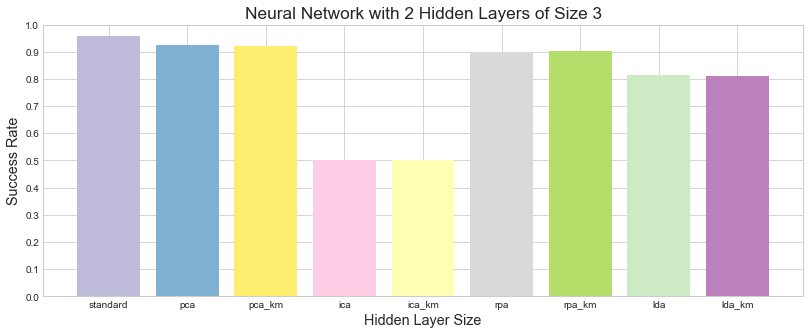

In [196]:
plot_nn('Neural Network with 2 Hidden Layers of Size 3','nn_reduced_data_2','Reduction Algo','Success Rate', 
        nn_red_data_alg, nn_red_data)

#### PCA ugly

In [42]:
%%time
# initialize prediction results

a_pca_ugly = []
# Run PCA and record results
for i in range(1,5,1):
    print("clusters: "+str(i))

    # fit the data
    pca = PCA(n_components=i, random_state=0)
    pca.fit(avocado_enc)
    
    a_pca_ugly.append(pca.fit_transform(avocado_enc))

clusters: 1
clusters: 2
clusters: 3
clusters: 4
CPU times: user 2.11 s, sys: 239 ms, total: 2.35 s
Wall time: 618 ms


In [47]:
nn_pca_ss = []
nn_pca_s = []

clf = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5, 
                        hidden_layer_sizes=(3,3), 
                        random_state=1)

# Fit the data
clf.fit(a_pca_ugly[2], avocado_labels_enc)
nn_pca_ss.append(clf.score(a_pca_ugly[2], avocado_labels_enc))


# Fit data with Cross-Validation
scores = cross_val_score(clf, a_pca_ugly[2], avocado_labels_enc, cv=fold)
nn_pca_s.append(scores.mean())

#### ICA ugly

In [44]:
%%time
# Initialize prediction results
a_ica_ugly = []

# Run ICA and record results
for i in range(1,10,1):
    print("components: "+str(i))

    # Fit the data
    ica = FastICA(n_components=i, random_state=0)
    ica.fit(avocado_enc)
    a_ica_ugly.append(ica.fit_transform(avocado_enc))

components: 1
components: 2
components: 3
components: 4
components: 5
components: 6
components: 7
components: 8
components: 9
CPU times: user 6.11 s, sys: 486 ms, total: 6.6 s
Wall time: 1.75 s


In [45]:
nn_ica_ss = []
nn_ica_s = []

clf = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5, 
                        hidden_layer_sizes=(3,3), 
                        random_state=1)

# Fit the data
clf.fit(a_ica_ugly[2], avocado_labels_enc)
nn_ica_ss.append(clf.score(a_ica_ugly[2], avocado_labels_enc))


# Fit data with Cross-Validation
scores = cross_val_score(clf, a_ica_ugly[2], avocado_labels_enc, cv=fold)
nn_ica_s.append(scores.mean())

#### RPA ugly

In [46]:
%%time
# Initialize prediction results
a_rpa_ugly = []

for i in range(1,10,1):
    # run RPA
    print("components: "+str(i))
    rpa = SparseRandomProjection(n_components=i, random_state=0)
    a_rpa_ugly.append(rpa.fit_transform(avocado_enc))

components: 1
components: 2
components: 3
components: 4
components: 5
components: 6
components: 7
components: 8
components: 9
CPU times: user 36.2 ms, sys: 5.02 ms, total: 41.2 ms
Wall time: 36.5 ms


In [48]:
nn_rpa_ss = []
nn_rpa_s = []

clf = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5, 
                        hidden_layer_sizes=(3,3), 
                        random_state=1)

# Fit the data
clf.fit(a_rpa_ugly[2], avocado_labels_enc)
nn_rpa_ss.append(clf.score(a_rpa_ugly[2], avocado_labels_enc))


# Fit data with Cross-Validation
scores = cross_val_score(clf, a_rpa_ugly[2], avocado_labels_enc, cv=fold)
nn_rpa_s.append(scores.mean())

#### LDA ugly

In [49]:
%%time
# Initialize prediction results
a_lda_ugly = []

# LDA
for i in range(1,3,1):
    # run lda
    print("components: "+str(i))
    lda = LinearDiscriminantAnalysis(n_components=i, store_covariance=True)

    lda.fit(avocado_enc,avocado_labels_enc)

    a_lda_ugly.append(lda.transform(avocado_enc))

components: 1


/Users/Connie/anaconda/envs/py2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


components: 2
CPU times: user 1.36 s, sys: 161 ms, total: 1.52 s
Wall time: 510 ms


/Users/Connie/anaconda/envs/py2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [50]:
nn_lda_ss = []
nn_lda_s = []

clf = MLPClassifier(solver='lbfgs', 
                        alpha=1e-5, 
                        hidden_layer_sizes=(3,3), 
                        random_state=1)

# Fit the data
clf.fit(a_lda_ugly[1], avocado_labels_enc)
nn_lda_ss.append(clf.score(a_lda_ugly[1], avocado_labels_enc))


# Fit data with Cross-Validation
scores = cross_val_score(clf, a_lda_ugly[1], avocado_labels_enc, cv=fold)
nn_lda_s.append(scores.mean())

In [51]:
nn_ugly_data = [nn_pca_s[0], nn_ica_s[0], nn_rpa_s[0], nn_lda_s[0]]
nn_ugly_data_alg = ['pca','ica','rpa','lda']

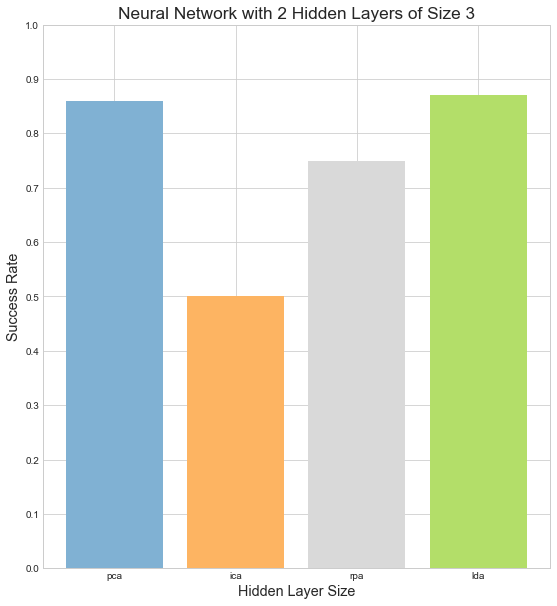

In [52]:
plot_nn('Neural Network with 2 Hidden Layers of Size 3','nn_ugly_data','Reduction Algo','Success Rate', 
        nn_ugly_data_alg, nn_ugly_data)

http://scikit-learn.org/stable/modules/cross_validation.html

https://matplotlib.org/users/pyplot_tutorial.html

https://www.cs.helsinki.fi/u/ahyvarin/papers/NN00new.pdf

http://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf

https://blog.paperspace.com/dimension-reduction-with-independent-components-analysis/